---
title: "算法交易：制胜策略与原理(欧内斯特·陈)之四"
author: 王一刀
categories: [算法交易]
date: 2024-08-30
format: html
---

相对于应用均值回归策略交易一对股票而言，要想做到持续盈利其实是很困难的，除非你对每一个公司都有一个基本的认知，同时，你能够在某个公司相关的坏消息公布于众之前平仓离场。

对可以配对交易的ETF基金的选择过程相当简单：我们只需要寻找那些暴露于共同的经济因素之下的ETF基金即可。除了国家级别的ETF基金以外，**行业ETF基金也拥有一个能够发现具有协整性质资产的肥沃的土壤**。例如，零售业基金RTH与消费品基金XLP就具有协整性质。随着对多少具有相同属性的行业ETF基金的增值功能的探索，相应的配对交易规模就稳步增长了。

我所喜欢的另一个ETF基金的配对交易是大宗商品之ETF基金和由生产这些商品的公司股票所构成的ETF基金之间所构建的投资组合。黄金相关的GLD基金与金矿金矿股票指数型基金GDX就是一个很好的例子，其基本原理是：由于金矿公司的主要资产是黄金，因此其股票的价值应该与黄金现货价格具有协整关系，而且事实上，两者之间的协整关系一直持续到2008年7月14日左右。

石油价格和黄金价格，以及与黄金企业股指之间的协整关系又是怎样的呢？显然，它们有很多相关性，而且事实证明：当石油价格变得昂贵，我就要花费更多的资金去开采黄金，如此，开采企业的利润就会减少，进而导致相关企业的股票价格相对于黄金现货价格来说表现不佳（“古怪黄金界”，2011）。


## 日间均值回归交易策略：缺口买入模式
* （1）于靠近开盘时刻，选择所有的自前一天的最低价至今日的开盘价之间的收益率低于一个标准差的股票。标准差的计算依据的是90天的日间收盘价的收益率，而被选中的股票就是“缺口”型的。
* （2）缩小所选股票的范围，留下那些开盘价格高于收盘价20日移动均线的股票。
* （3）在剩余股票中，买入10只，要求是：此类股票价格与前一日之最低价格相比较而得出的收益率最低。如果能够买入的数量少于10只股票，那就买入上述的所有股票。
* （4）在收盘之前清算所有股票。
上述这种策略的基本原理是：当股指期货的价格于开盘之前下跌，那么，由于市场上的恐慌情绪，某些股票于开盘之时会被不成比例地抛售。但是，一旦这种恐慌性抛售结束，股票于当天将会逐步地升值。

上述第二个规则通常是非常有用的均值回归型的交易策略：它基本上是一个动量过滤法则再叠加一个均值回归策略，这是我们经常重复的一种技术。在通常情况之下，那些价格跌了“一点点”的股票相较于那些跌了“很多”的股票而言，会有一个更好的反转契机，因为后者经常会面临负面新闻的冲击，比如营业收入公告不如人意等。由负面消息所造成的价格下降是不太可能恢复的。



APR=0.054392 Sharpe=1.163273


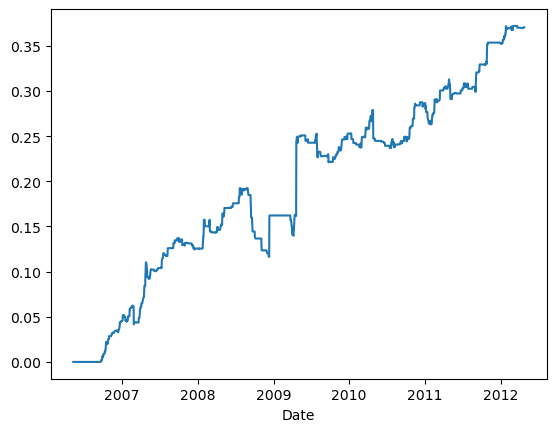

In [4]:
# Example 4.1: Buy-on-Gap Model on SPX Stocks

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.tsa.stattools as ts
#import statsmodels.tsa.vector_ar.vecm as vm

topN=10 # Max number of positions 最大持仓数量
entryZscore=1 #用于计算买入价格的Z分数
lookback=20 # for MA 用于计算移动平均的天数
# 它需要三个T×N型的输入数组，即op数组、lo数组和cl数组，其中，T代表的是天数，N代表的是仓中的股票数量，同时，op包含的是每日的开盘价格，lo包含的是每日的最低价格，而cl是每日的收盘价。
op=pd.read_csv('datas/inputDataOHLCDaily_20120424_op.csv')
hi=pd.read_csv('datas/inputDataOHLCDaily_20120424_hi.csv')
lo=pd.read_csv('datas/inputDataOHLCDaily_20120424_lo.csv')
cl=pd.read_csv('datas/inputDataOHLCDaily_20120424_cl.csv')

stocks=pd.read_csv('datas/inputDataOHLCDaily_20120424_stocks.csv')

op['Var1']=pd.to_datetime(op['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
op.columns=np.insert(stocks.values, 0, 'Date')
op.set_index('Date', inplace=True)
# print(op)

hi['Var1']=pd.to_datetime(hi['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
hi.columns=np.insert(stocks.values, 0, 'Date')
hi.set_index('Date', inplace=True)

lo['Var1']=pd.to_datetime(lo['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
lo.columns=np.insert(stocks.values, 0, 'Date')
lo.set_index('Date', inplace=True)

cl['Var1']=pd.to_datetime(cl['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
cl.columns=np.insert(stocks.values, 0, 'Date')
cl.set_index('Date', inplace=True)
# 计算过去90天的收盘价标准差（stdretC2C90d）
stdretC2C90d=cl.pct_change().rolling(90).std().shift(1)
# 计算买入价格（buyPrice），即最低价减去一个Z分数乘以过去90天的收盘价标准差。
buyPrice=lo.shift()*(1-entryZscore*stdretC2C90d)
# 计算开盘价与前一天的最低价之间的收益差（retGap）
retGap=(op-lo.shift())/lo.shift()
# 计算移动平均
ma=cl.rolling(lookback).mean()
# 初始化持仓表（positionsTable）并遍历每一天
positionsTable=np.zeros(retGap.shape)


for t in np.arange(1, cl.shape[0]):
    # 对于每一天，找到满足以下条件的股票：收益差有限、开盘价低于买入价格且高于移动平均
    hasData=np.where(np.isfinite(retGap.iloc[t, :]) & (op.iloc[t, :] < buyPrice.iloc[t, :]).values & (op.iloc[t, :] > ma.iloc[t, :]).values)
    hasData=hasData[0]
    if len(hasData)>0:
        # 对满足条件的股票按收益差排序，并将前topN个股票的持仓表位置设为1
        idxSort=np.argsort(retGap.iloc[t, hasData])  
        positionsTable[t, hasData[idxSort.values[np.arange(-np.min((topN, len(idxSort))),0)]]]=1

retO2C=(cl-op)/op
    
pnl=np.sum(positionsTable*retO2C, axis=1) # daily P&L of the strategy
ret=pnl/topN
(np.cumprod(1+ret)-1).plot()
print('APR=%f Sharpe=%f' % (np.prod(1+ret)**(252/len(ret))-1, np.sqrt(252)*np.mean(ret)/np.std(ret)))


你可以同时做多，且做空某个公司的股票；或者，你可以做多股票，同时用股指期货的空头进行对冲；你也可以购买更大数量的股票，但同时限制同一行业的股票数量；你还可以于市场开盘时刻之外扩展购买的期限；你也可以实施盘中“抢帽子”交易。但是，这里有一个重要的信息：以日间棒线为样本、不具有均值回归属性的价格系列可以在特定的时期表现出强烈的均值回归属性，这是较短时间尺度所呈现的季节性的工作原理。


## “抢帽子”交易

“抢帽子”交易是一种短线交易策略，通常是指在股票市场中，投资者试图通过在极短的时间内买入和卖出股票来获利。这种策略的名称来源于一种想象中的场景，即投资者像抢帽子一样迅速地买入和卖出股票。

“抢帽子”交易的特点包括：

1. 高频交易：这种策略通常涉及大量的交易，而且交易频率非常高。投资者需要密切关注市场动态，并在短时间内做出决策。

2. 短线操作：由于交易频率高，投资者通常只持有股票很短的时间，可能是几分钟甚至几秒钟。因此，这种策略需要投资者具备快速反应和决策的能力。

3. 利用市场波动：抢帽子交易者通常会利用市场的短期波动来获利。他们会在股价上涨时迅速买入，然后在股价达到高点时迅速卖出；或者在股价下跌时迅速卖出，然后在股价触底时迅速买入。

4. 风险较高：由于抢帽子交易涉及高频交易和短线操作，因此风险也相对较高。如果市场波动剧烈或者投资者的决策出现失误，可能会导致巨大的损失。

5. 需要专业技能：抢帽子交易需要投资者具备丰富的市场经验和专业知识，以便能够准确判断市场趋势和时机。此外，投资者还需要具备良好的心理素质和风险控制能力。

需要注意的是，**“抢帽子”交易在中国是被禁止的**。根据中国证监会发布的《关于加强对利用“荐股软件”从事证券投资咨询业务监管的暂行规定》，投资者在证券交易活动中不得有“抢帽子”交易等操纵市场的行为。因此，投资者应该遵守相关法律法规，远离任何非法的交易行为。

## ETF基金与成分股之间的套利模式

许多读者对“指数套利”的相关策略应该是很熟悉的，即在股票的投资组合与指数期货之间构建一种对冲的关系，并按照它们之间的价差进行相关的交易。

高频交易员已经能够利用日间交易中的两个缺陷来计算股指期货与成分股之间的套利比率及相关指标，其中第一个缺陷是：许多主要的指数，包括道琼斯指数（DowJones）、标准普尔指数（S&P）、纳斯达克指数（Nasdaq）和罗素指数（Russell），其计算程序只使用初级市场的交易数据（详见第1章对初级市场与综合股票价格的论述），而这只代表了不到30%的被交易的股票（阿诺、萨鲁奇，2012）；第二个缺陷是：相关该指数每隔几秒钟就要更新一次。前述两个缺陷会导致由一组股票所构成的“篮子”证券的价格以及股指本身的价格在不断地被更新，从而生成它们之间的市值差异。因此，对股指期货价值的预期较之瞬时变化的股票市值而言，会有稍许的延迟。如果股指期货的价值高于成分股的瞬时市值，那我们就可以做空股指期货，反之亦然。那么，我们在哪里可以发现这个事实呢？是瞬时变化的股票市值吗？当然，我们需要从所有美国证交所和电子交易平台（ECN）（而不是证券行业自动化公司，SIAC）订阅直接的数据，同时，我们要在相关的交易场所对指数相关的所有股票的交易价格实施监控，而且，延迟的时间要以毫秒来计算。所以，没有人能说“高频交易”是件很容易的事情！

我们将选择一年的数据（在我们的例子中，我们选择的是2007年1月1日至2007年12月31日的数据）作为训练集，然后以约翰森检验模式寻找所有那些与SPY基金的协整属性达到90%概率之上的股票，接下来，我们用这些股票构建一个投资组合，且对每只股票平均分配资金，再用约翰森检验模式进行测试，确认此多头形式的投资组合是否仍然与SPY基金具有协整关系。前述这一步是必要的，因为一个任意金额以相等权重将资本平均分配给每只股票，而由这些股票所构建的组合并不一定与SPY基金具有协整关系，即使每个成分股都与SPY基金具有协整关系，投资组合的情况也是如此。我们在第二个测试当中使用了价格的对数形式，因为我们希望每天都调整这个组合，进而使每个股票的资本都是恒定的（详见第3章的讨论内容）。在确认相关的协整属性之后，我们就可以回测在第2章所描述的线性均值回归的交易策略，




98
[15.86864835  6.19735725]
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[9.6712911  6.19735725]
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
APR=0.044930 Sharpe=1.320011


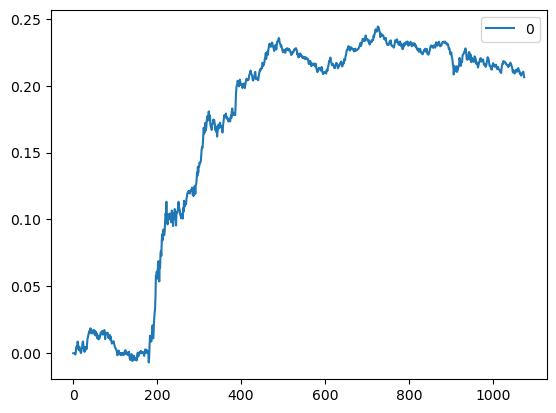

In [7]:
# Example 4.2: Arbitrage between SPY and Its Component Stocks

import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.tsa.stattools as ts
import statsmodels.tsa.vector_ar.vecm as vm

# Stocks
cl=pd.read_csv('datas/inputDataOHLCDaily_20120424_cl.csv')
stocks=pd.read_csv('datas/inputDataOHLCDaily_20120424_stocks.csv')

cl['Var1']=pd.to_datetime(cl['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
cl.columns=np.insert(stocks.values, 0, 'Date')
cl.set_index('Date', inplace=True)

# ETFs
cl_etf=pd.read_csv('datas/inputData_ETF_cl.csv')
etfs=pd.read_csv('datas/inputData_ETF_stocks.csv')

cl_etf['Var1']=pd.to_datetime(cl_etf['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
cl_etf.columns=np.insert(etfs.values, 0, 'Date')
cl_etf.set_index('Date', inplace=True)

# Merge on common dates
df=pd.merge(cl, cl_etf, how='inner', on='Date')

cl_stocks=df[cl.columns]
cl_etf=df[cl_etf.columns]

# Use SPY only
cl_etf=cl_etf['SPY'] # This turns cl_etf into Series

trainDataIdx=df.index[(df.index > pd.to_datetime("2007-01-01").date()) & (df.index <= pd.to_datetime("2007-12-31").date())]
testDataIdx =df.index[df.index > pd.to_datetime("2007-12-31").date()]

# 我们基于约翰森检验的原理对SPY基金的每只成分股与SPY基金本身之间的协整关系进行测试，之后我们发现：有98只股票分别与SPY基金具有协整关系。
# 现在，我们可以将所有与SPY基金具有协整关系的股票之多头形式构成一个投资组合，且配置同样的资本，但是，我们还必须测试这个投资组合与SPY基金的协整关系，

isCoint=np.full(stocks.shape[1], False)
for s in range(stocks.shape[1]):
    # Combine the two time series into a matrix y2 for input into Johansen test
    y2=pd.concat([cl_stocks.loc[trainDataIdx].iloc[:, s], cl_etf.loc[trainDataIdx]], axis=1)
    y2=y2.loc[y2.notnull().all(axis=1),]
    
    if (y2.shape[0] > 250):
        # Johansen test 对每个成分股与SPY进行协整检验
        result=vm.coint_johansen(y2.values, det_order=0, k_ar_diff=1)
        if (result.lr1[0] > result.cvt[0,0]): # 如果存在协整关系，则将对应的成分股标记为True
            isCoint[s]=True
        
print(isCoint.sum())

yN=cl_stocks.loc[trainDataIdx, isCoint]
# 计算仅做多组合的净市场价值
logMktVal_long=np.sum(np.log(yN), axis=1) # The net market value of the long-only portfolio is same as the "spread"

# Confirm that the portfolio cointegrates with SPY 确认组合与SPY的协整关系
ytest=pd.concat([logMktVal_long, np.log(cl_etf.loc[trainDataIdx])], axis=1)
result=vm.coint_johansen(ytest, det_order=0, k_ar_diff=1)
print(result.lr1)
print(result.cvt)
print(result.lr2)
print(result.cvm)
# 上述约翰森测试表明股票的多头组合与SPY基金的协整属性达到95%以上的概率。所以，我们可以构建一个包括股票和SPY基金在内的多单-空单相间的平稳投资组合，
# 同时，我们可以使用约翰森检验中的特征向量来确定SPY基金与股票投资组合的权重（事实上，即使二者之间存在协整关系，我们也可以选择特征向量矩阵eigenmatrix中的、位于第一列的最大值来构建平稳的投资组合）。

#Apply linear mean-reversion model on test set 应用线性均值回归模型
yNplus=pd.concat([cl_stocks.loc[testDataIdx, isCoint], pd.DataFrame(cl_etf.loc[testDataIdx])], axis=1)  # Array of stock and ETF prices
# 计算测试集中的投资组合权重
weights=np.column_stack((np.full((testDataIdx.shape[0], isCoint.sum()), result.evec[0,0]), np.full((testDataIdx.shape[0], 1), result.evec[1, 0]))) # Array of log market value of stocks and ETF's
# 计算投资组合的净市场价值
logMktVal=np.sum(weights*np.log(yNplus), axis=1) # Log market value of long-short portfolio

lookback=5
# 计算投资组合的单位资本投入
numUnits =-(logMktVal-logMktVal.rolling(lookback).mean())/logMktVal.rolling(lookback).std() # capital invested in portfolio in dollars.  movingAvg and movingStd are functions from epchan.com/book2
# 计算每日持仓
positions=pd.DataFrame(np.expand_dims(numUnits, axis=1)*weights)# results.evec(:, 1)' can be viewed as the capital allocation, while positions is the dollar capital in each ETF.
pnl=np.sum((positions.shift().values)*(np.log(yNplus)-np.log(yNplus.shift()).values), axis=1) # daily P&L of the strategy
# print(positions.shift())
denominator = np.sum(np.abs(positions.shift()), axis=1)  
# print(denominator.values)
# print(pnl.values)
denominator = np.where(denominator == 0, 1e-9, denominator)  # 使用一个非常小的数替换零
# print(denominator)
ret=pd.DataFrame(pnl.values/denominator)
(np.cumprod(1+ret)-1).plot()
print('APR=%f Sharpe=%f' % ((np.prod(1+ret,axis=0)**(252/len(ret))-1).iloc[0], (np.sqrt(252)*np.mean(ret)/np.std(ret,axis=0)).iloc[0]))


“PnL” 是 "Profit and Loss" 的缩写，中文意思是“盈亏”或“损益”。在金融领域，PnL 通常用于描述一个投资策略、交易或其他金融产品的盈利或亏损情况。它反映了在一定时间范围内，投资从初始投资金额到终值的变化。

PnL 可以用于评估投资策略的表现，帮助投资者了解他们的投资是否成功，以及成功的程度如何。PnL 的计算通常包括以下几个步骤：

1. 确定投资组合的初始价值。
2. 确定投资组合在特定时间点的价值。
3. 计算两者之间的差异，即 PnL = 投资组合终值 - 投资组合初始价值。

正的 PnL 表示盈利，负的 PnL 表示亏损。通过分析 PnL，投资者可以更好地了解他们的投资策略的风险和回报特性，从而做出更明智的投资决策。

>当然，与上述问题系统的理念可以适用于任何ETF基金、指数或指数子集的交易。此外，如果存在一个跟踪指数或指数子集的期货合约，那我们就可以使用这个期货来取代ETF基金，但是在这种情况下，我们必须对相应的期货价格倍加小心，即使用于回测的期货价格与股票的收盘价格同步运行，也不例外.  
你可能想知道：为什么我们不直接运行约翰森检验模式，检测标准普尔指数所包含的500只股票与SPY基金之间的协整属性，然后让相关算法为包含SPY基金在内的所有具有协整关系的金融工具自动寻找一个特征向量呢？（其实，并不是所有具有协整关系的股票+SPY基金的仓内头寸都必然包括SPY基金本身，但是我们只需要选择一个。）与这种相关的方法论有着双重含义：  
>* （1）在约翰森测试的实施过程中，我知道的其所能接受的函数符号最多是12个（LeSage，1998）。
>* （2）特征向量通常会涉及股票的多、空两个头寸，这意味着我们不能做多股票的投资组合，同时用SPY基金的空头进行对冲，反之亦然。这就存在一个问题：如果我们在股票投资组合中拥有空头头寸，而同时又做空SPY基金，那么，即使我们做多股票的投资组合，但存在的两个空方头寸会增加我们的特定的风险。

>关于上述的问题，我们有一个替代的方法，即构造一个多-空头寸并存的股票投资组合。我们仍然可以使用约翰森检验模式——单独测试标准普尔（SPX）指数中每只股票与SPY基金的协整属性，找到相应的股票子集之后，将其纳入股票的投资组合之内，然后，使用一个约束优化方法（如遗传算法和模拟退火算法）来减少股票投资组合的价格系列和SPY基金的价格系列之间的平均差的绝对值——在这种情况下，我们想要优化的变量就是股票的对冲比率，同时，我们的约束条件是：所有对冲比率的值必须是正数。全球MATLAB优化工具箱会提供遗传算法和模拟退火函数来完成这种具有“约束性”的优化任务。

>由于上述这一策略涉及股票的空方头寸，因此同样受制于卖空交易的约束机制，其实，任何涉及做空的策略都不例外。但是，在这里，此类问题不是太严重，因为相应的投资组合包含的是非常多样化的股票，如果由于卖空约束机制的限制而必须移除几只股票，那影响应该也是有限的。


遗传算法（Genetic Algorithm, GA）和模拟退火算法（Simulated Annealing, SA）都是启发式优化算法，用于解决组合优化问题和全局优化问题。它们都模拟了自然现象，遗传算法模仿了生物进化过程中的自然选择和基因交叉，而模拟退火算法则模仿了物理中的退火过程。

### 遗传算法 (GA)

遗传算法的基本思想是通过模拟生物进化过程中的自然选择、遗传和变异来搜索最优解。遗传算法的主要步骤包括：

1. **初始化种群**：随机生成一组解作为初始种群。
2. **适应度评估**：计算每个个体（解）的适应度（目标函数值）。
3. **选择**：根据适应度选择优秀的个体进行繁殖。
4. **交叉**：通过基因交叉操作产生新的个体。
5. **变异**：对新产生的个体进行变异操作，增加种群的多样性。
6. **终止条件**：达到预设的迭代次数或其他停止条件时终止算法。

遗传算法的优点是能够在大规模搜索空间中找到近似最优解，并且具有较好的全局搜索能力。缺点是收敛速度较慢，且有可能陷入局部最优解。

### 模拟退火算法 (SA)

模拟退火算法的基本思想是通过模拟物理中的退火过程来搜索最优解。退火是一种金属热处理工艺，通过将金属加热到高温，然后缓慢降温，使金属内部的原子达到稳定状态。模拟退火算法的主要步骤包括：

1. **初始化**：随机生成一个初始解，并设置初始温度。
2. **邻域搜索**：在当前解的邻域内随机生成一个新解。
3. **接受准则**：根据Metropolis准则判断是否接受新解。如果新解的目标函数值更好，则接受新解；如果更差，则以一定概率接受新解，这个概率与温度和目标函数值差有关。
4. **降温**：降低温度。
5. **终止条件**：达到预设的迭代次数或温度降至设定阈值时终止算法。

模拟退火算法的优点是能够跳出局部最优解，具有较好的全局搜索能力。缺点是收敛速度较慢，且参数设置对算法性能有很大影响。

### 总结

遗传算法和模拟退火算法都是有效的启发式优化算法，适用于解决复杂的优化问题。遗传算法通过模拟生物进化过程，具有较好的全局搜索能力；而模拟退火算法通过模拟物理退火过程，能够跳出局部最优解。在实际应用中，可以根据问题的特点和需求选择合适的算法，或者将两种算法结合使用以提高优化效果。

在基于协整检验的均值回归策略相关的交易当中，我们以一组固定的金融工具和固定数量的股票，或每个金融工具所配置的一定数额的美元资本来构建一个投资组合。这种固定的数量可以由菲亚特模式（如例4-2所示）、线性回归模式、约翰森测试模式，或约束优化模式来予以确定。但是，没有理由来解析一个问题，即为什么投资组合每天需要包含相同的、数量固定的金融工具，而且，数量固定的金融工具具有相同的权重。其实，许多基于股票交易策略而构建的投资组合的优势恰恰应该是：每日精明地选择股票，同时，对相应的权重，要重新进行加权。

在所谓的“跨行业”（通常被称之为“横截面”）均值回归策略当中，相关个股价格不一定向自己的历史性的均值回归（这种类型的策略通常只包括股票交易，不包含期货交易，或货币交易）；相反，其重点是相关股票的短期相对收益率；同时，我们依靠这些相对收益率的序列反相关模式而生成相应利润。在大多数情况下，相对收益率的数值是通过特定股票的收益率减去仓内头寸相关的所有股票的平均收益率而得出的。之所以如此，是因为我们预期那些表现不佳的股票在之后的绩效可能会超出市场的平均水平，反之亦然。因为我们只测量相对的收益率，因此，我们很有可能做空一些股票，即使其先前的（绝对）收益率是负值，但只要它的数值高于仓内所有股票的平均收益率即可。

我在之前的一本书中曾经描述过一个交易策略，此策略由汉丹和罗开发（出现于陈先生的2009年著作之中的例3-7；原始论文由汉丹和罗于2007年所著）。这种策略是：我们投资买入一些股票，这些股票大都是标准普尔500指数（S&P500）、标准普尔1500指数（S&P1500），或罗素2000指数（Russell2000）中的成分股，我们对每只股票都予以配置资本，但配置的比重各有不同。在每一天靠近收盘的时间段内，我们将决定多头资本，或空头资本wi配置给第i只股票（ith）

换句话说，如果一只股票相对于同类股票来说有一个较高的回报率，那么，我们会大量做空此股票，而如果它相对于同类股票来说表现消极，那我们就会大量做多此股票。

APR=0.136776 Sharpe=1.259979
APR=0.731553 Sharpe=4.715156


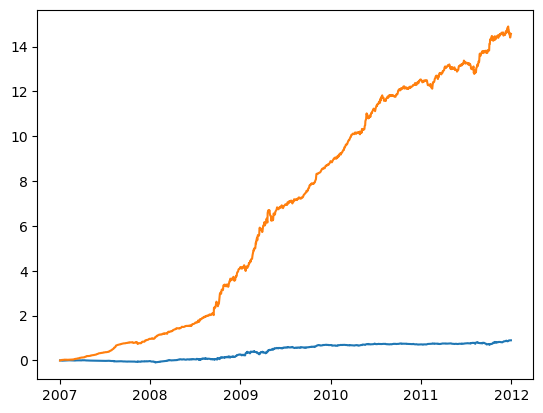

In [8]:
# Example 4.3: Linear Long-Short Model on Stocks
# 股票相关的线性多-空模式
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.tsa.stattools as ts
#import statsmodels.tsa.vector_ar.vecm as vm

# Stocks
cl_=pd.read_csv('datas/inputDataOHLCDaily_20120424_cl.csv')
stocks=pd.read_csv('datas/inputDataOHLCDaily_20120424_stocks.csv')

cl_['Var1']=pd.to_datetime(cl_['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
cl_.columns=np.insert(stocks.values, 0, 'Date')
cl_.set_index('Date', inplace=True)

cl_=cl_.loc[(cl_.index >= pd.to_datetime("2007-01-03").date()) & (cl_.index <= pd.to_datetime("2011-12-30").date()),:]

op=pd.read_csv('datas/inputDataOHLCDaily_20120424_op.csv')
op['Var1']=pd.to_datetime(op['Var1'],  format='%Y%m%d').dt.date # remove HH:MM:SS
op.columns=np.insert(stocks.values, 0, 'Date')
op.set_index('Date', inplace=True)

op=op.loc[(op.index >= pd.to_datetime("2007-01-03").date()) & (op.index <= pd.to_datetime("2011-12-30").date()),:]
# 基于收盘价的策略
ret=cl_.pct_change() # daily returns

marketRet=np.mean(ret, axis=1) # equal weighted market index return

weights=-(np.array(ret)-np.reshape(marketRet.values, (ret.shape[0], 1)))
weights=weights/pd.DataFrame(np.abs(weights)).sum(axis=1).values.reshape((weights.shape[0], 1))
weights=pd.DataFrame(weights, columns=stocks.values[0], index=np.array(ret.index))

dailyret=(weights.shift()*ret).sum(axis=1) # Capital is always one


((1+dailyret).cumprod()-1).plot()
print('APR=%f Sharpe=%f' % (np.prod(1+dailyret)**(252/len(dailyret))-1, np.sqrt(252)*np.mean(dailyret)/np.std(dailyret)))
# APR=13.7%, Sharpe=1.3
# 基于开盘价和收盘价的策略
ret=(op-cl_.shift())/cl_.shift() # daily returns

marketRet=np.mean(ret, axis=1) # equal weighted market index return

weights=-(np.array(ret)-np.reshape(marketRet.values, (ret.shape[0], 1)))
weights=weights/pd.DataFrame(np.abs(weights)).sum(axis=1).values.reshape((weights.shape[0], 1))
weights=pd.DataFrame(weights, columns=stocks.values[0], index=np.array(ret.index))

dailyret=(weights*(cl_-op)/op).sum(axis=1) # Capital is always one

((1+dailyret).cumprod()-1).plot()
print('APR=%f Sharpe=%f' % (np.prod(1+dailyret)**(252/len(dailyret))-1, np.sqrt(252)*np.mean(dailyret)/np.std(dailyret)))

上述策略的显著特点是：它完全是线性的，且没有参数，相应资本又是完美中性的。

在我以前的著作当中，我也曾建议：我们应该使用靠近今日开盘时刻的之前的收益率指标来确定今日开盘时各类资产的权重，进而提高相关交易策略的整体收益。同时，在收盘之前，我们应该将仓内的头寸全部结清，从而使相应策略变成盘中（日间）的交易策略，

以上程序的运行结果是：同期年化收益率和夏普比率分别是73%和4.7。尽管有这样出色的绩效，但是开盘价-收盘价的模式仍然有一定的期限，而此缺陷在收盘价-收盘价模式中是没有的，那么，相应模式都有哪些缺陷呢？第一，交易成本（不包括在我们的回测系统当中）将翻倍，因为，我们是一天交易两次，而不是一次交易一天；第二，由于这种策略也必须使用“开盘”价格来确定开盘时刻入场的交易信号，而这同样会产生我在例4-1中所提到的噪声交易信号。

实际上，即使对于收盘价-收盘价的交易策略而言，我们也不能用确切的收盘价来确定相关的权重，然后按照这些价格入场。但是，在这种情况下，闭市几秒钟之前的价格通常更接近实际的官方（初级交易所）公布的收盘价格，因为这些收盘之前的价格在初级市场第二天开盘之时需要被打印出来，而且具有较高的流动性。

另外，上述相关策略还有可能存在其他变量（也被称为“要素”），这些变量更善于预测股票价格相关的跨行业（横截面）式的均值回归模式的运行效应，可能比我们在例4-3和例4-4中所使用的相对收益率的模式要好：一个流行的，且被交易员常常使用的变量是衡量股票等级的市盈率（P/E）比率，此比率可能是最后一个季度的收益率，也可能是由分析师或股票发行公司本身所估计的预期收益。收益率的推理模式是：如果收入公告或相关预期发生变化，那么，股票价格将转向一个新的均衡点位，所以，如果对股票的收益预期是正偏的，那么，相关股票的收益率就可能呈现正值，同时，我们不应预期：如果相应收益率与预期的估计值呈等比例变化，那么，相关股票价格就会呈现均值回归的属性。因此，如果我们使用市盈率对股票进行排名的话，我们就可以避免卖空这些股票。
